# MINI PROJECT




HousePrice Prediction Using Regression

#IMPORT Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hp=pd.read_csv("E:\ml dataset\housepred.csv")

In [3]:
hp


,Id,Street,YearBuilt,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SaleType,SaleCondition,SalePrice
0,1,Pave,2003,3,1,Gd,8,Typ,0,Attchd,2,548,Y,0,61,0,2008,WD,Normal,208500
1,2,Pave,1976,3,1,TA,6,Typ,1,Attchd,2,460,Y,298,0,0,2007,WD,Normal,181500
2,3,Pave,2001,3,1,Gd,6,Typ,1,Attchd,2,608,Y,0,42,0,2008,WD,Normal,223500
3,4,Pave,1915,3,1,Gd,7,Typ,1,Detchd,3,642,Y,0,35,272,2006,WD,Abnorml,140000
4,5,Pave,2000,4,1,Gd,9,Typ,1,Attchd,3,836,Y,192,84,0,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Pave,1999,3,1,TA,7,Typ,1,Attchd,2,460,Y,0,40,0,2007,WD,Normal,175000
1456,1457,Pave,1978,3,1,TA,7,Min1,2,Attchd,2,500,Y,349,0,0,2010,WD,Normal,210000
1457,1458,Pave,1941,4,1,Gd,9,Typ,2,Attchd,1,252,Y,0,60,0,2010,WD,Normal,266500
1458,1459,Pave,1950,2,1,Gd,5,Typ,0,Attchd,1,240,Y,366,0,112,2010,WD,Normal,142125


In [4]:
hp.head()

,Id,Street,YearBuilt,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SaleType,SaleCondition,SalePrice
0,1,Pave,2003,3,1,Gd,8,Typ,0,Attchd,2,548,Y,0,61,0,2008,WD,Normal,208500
1,2,Pave,1976,3,1,TA,6,Typ,1,Attchd,2,460,Y,298,0,0,2007,WD,Normal,181500
2,3,Pave,2001,3,1,Gd,6,Typ,1,Attchd,2,608,Y,0,42,0,2008,WD,Normal,223500
3,4,Pave,1915,3,1,Gd,7,Typ,1,Detchd,3,642,Y,0,35,272,2006,WD,Abnorml,140000
4,5,Pave,2000,4,1,Gd,9,Typ,1,Attchd,3,836,Y,192,84,0,2008,WD,Normal,250000


In [5]:
hp.shape

(1460, 20)

In [6]:
hp.isnull().sum()

Id                0
Street            0
YearBuilt         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [7]:
feature_withna=[features for features in hp.columns if hp[features].isnull().sum()]
for feature in  feature_withna:
    print(feature,hp[feature].isnull().sum())

GarageType 81


In [8]:
hp['GarageType']=hp['GarageType'].fillna('Missing')

In [9]:
num_feature=[feature for feature in hp.columns if hp[feature].dtypes !='O']
print("the numerical feature is:",len(num_feature))

hp[num_feature].head()

the numerical feature is: 13


,Id,YearBuilt,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice
0,1,2003,3,1,8,0,2,548,0,61,0,2008,208500
1,2,1976,3,1,6,1,2,460,298,0,0,2007,181500
2,3,2001,3,1,6,1,2,608,0,42,0,2008,223500
3,4,1915,3,1,7,1,3,642,0,35,272,2006,140000
4,5,2000,4,1,9,1,3,836,192,84,0,2008,250000


In [10]:
year_feature=[feature for feature in num_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YrSold']

Text(0.5, 1.0, 'price of house based on year sold')

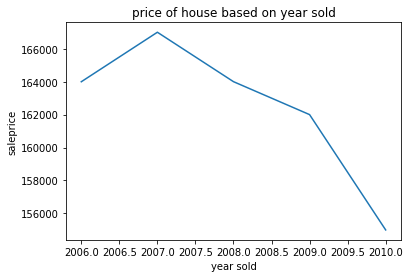

In [11]:
hp.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("saleprice")
plt.title("price of house based on year sold")



In [12]:
disc_feature=[feature for feature in num_feature if len(hp[feature].unique())<50 and feature not in year_feature+['Id']]
print(len(disc_feature))
print(disc_feature)


5
['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


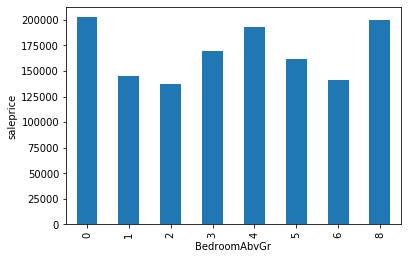

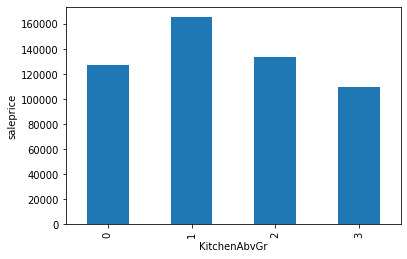

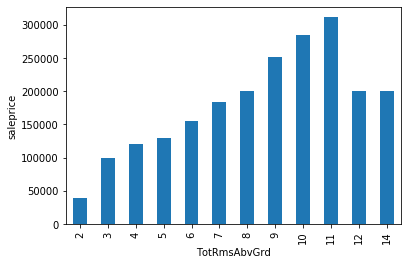

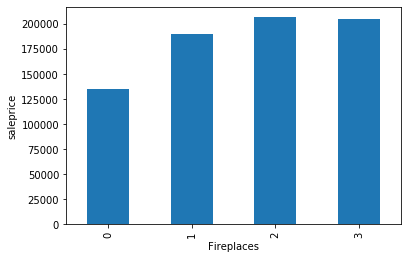

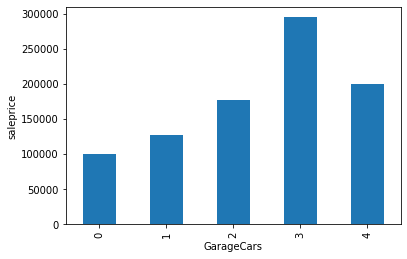

In [13]:
for feature in disc_feature:
    hp.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('saleprice')
    plt.show()

In [14]:
con_feature=[feature for feature in num_feature if feature not in disc_feature+year_feature+['Id']]
print(len(con_feature))
print(con_feature)


5
['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']


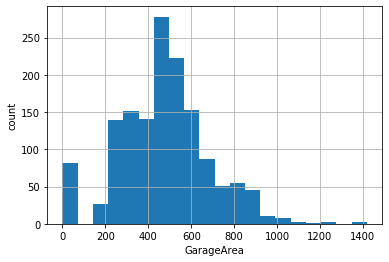

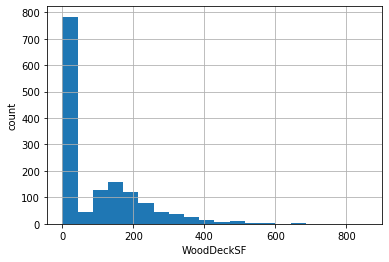

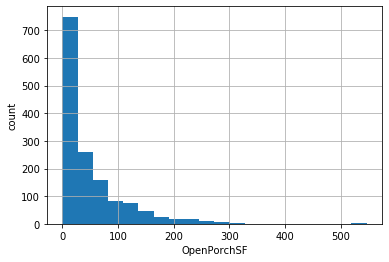

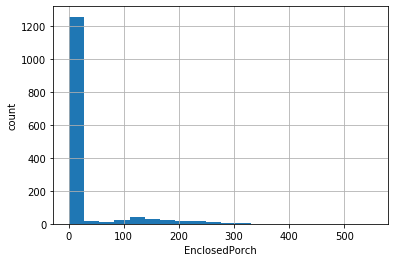

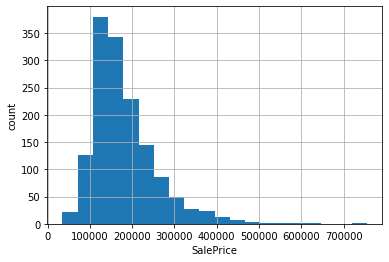

In [15]:
for feature in con_feature:
    hp[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

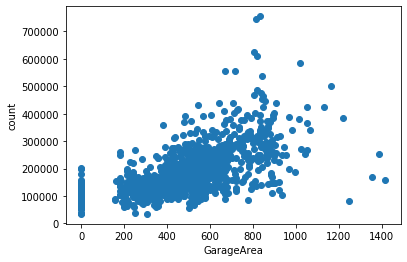

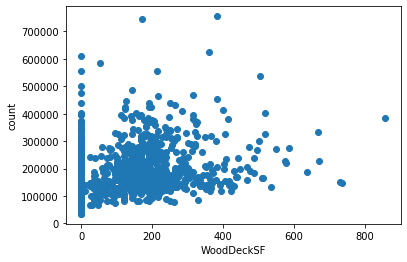

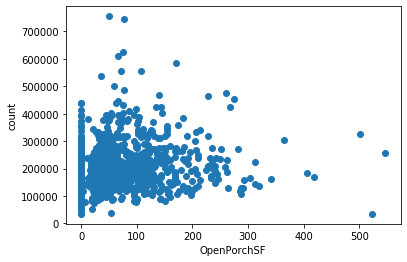

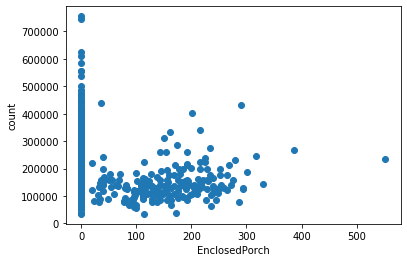

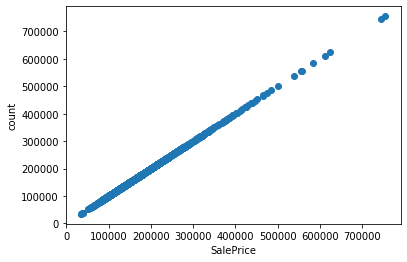

In [16]:
for feature in con_feature:
    plt.scatter(hp[feature],hp['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()
    
    

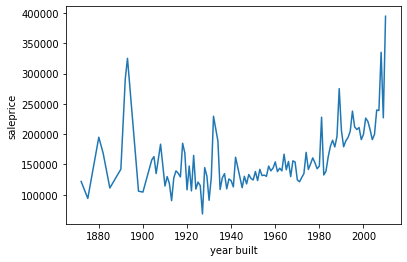

In [17]:
hp.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel("year built")
plt.ylabel("saleprice")
plt.show()

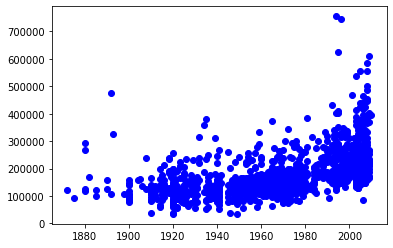

In [18]:
plt.scatter(hp["YearBuilt"],hp["SalePrice"],color='blue')


plt.show()

In [19]:
categorical_feature=[feature for feature in hp.columns if hp[feature].dtypes=='O']
print(len(categorical_feature))
print(categorical_feature)


7
['Street', 'KitchenQual', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [20]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()
hp['Street']=ld.fit_transform(hp['Street'])
hp['KitchenQual']=ld.fit_transform(hp['KitchenQual'])
hp['Functional']=ld.fit_transform(hp['Functional'])
hp['GarageType']=ld.fit_transform(hp['GarageType'])
hp['PavedDrive']=ld.fit_transform(hp['PavedDrive'])
hp['SaleType']=ld.fit_transform(hp['SaleType'])
hp['SaleCondition']=ld.fit_transform(hp['SaleCondition'])


In [21]:
x=hp.drop('SalePrice',axis=1)
y=hp["SalePrice"]

In [22]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)


In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x=pca.fit_transform(x)


In [24]:

from sklearn.model_selection import train_test_split



In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linreg=LinearRegression()

In [28]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_predict=linreg.predict(x_test)

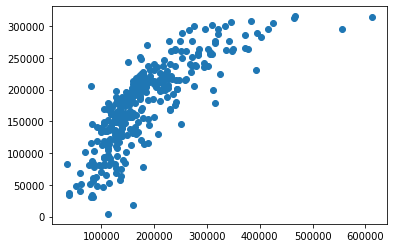

In [30]:
pred=linreg.predict(x_test)
plt.scatter(y_test,pred)
plt.show()


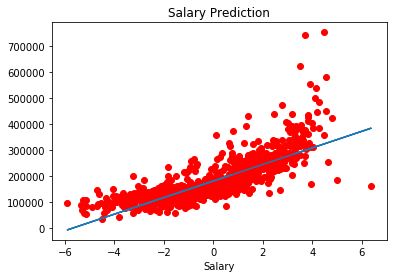

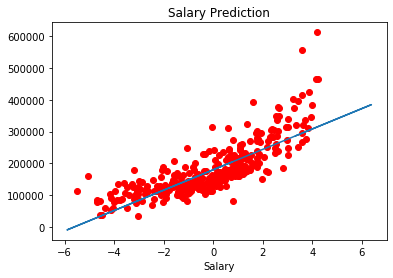

In [31]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,linreg.predict(x_train))
plt.title("Salary Prediction")
plt.xlabel("YOF")
plt.xlabel("Salary")
plt.show()
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,linreg.predict(x_train))
plt.title("Salary Prediction")
plt.xlabel("YOF")
plt.xlabel("Salary")
plt.show()

In [32]:
np.round(linreg.score(x_train,y_train)*100,2)




61.37

In [33]:
np.round(linreg.score(x_test,y_test)*100,2)


63.38